# 希臘三哲
* 蘇格拉底-Socrates
* 柏拉圖-Plato
* 亞里士多德-Aristotle


## 什麼是愛情？
有一天，柏拉圖問蘇格拉底：「什麼是愛情？」

蘇格拉底說：「我請你穿越這片稻田，去摘一株最大最金黃的麥穗回來，但是有個規則：你不能走回頭路，而且你只能摘一次。」

於是柏拉圖去做了。許久之後，他卻空著雙手回來了。

蘇格拉底問他：「怎麼了？空手回來了？」

柏拉圖說道：「當我走在田間的時候，曾看到過幾株特別大特別燦爛的麥穗，可是，我總想著前面也許會有更大更好的，於是就沒有摘；但是，我繼續走的時候，看到的麥穗，總覺得還不如先前看到的好，所以我最後什?都沒有摘到…。」

蘇格拉底意味深長地說：「這，就是愛情。」





## 數學化柏拉圖問題

稻田中總共有݊ $n$ 株稻穗，且每株稻穗有一個隨機的相應值以代表這株稻穗有多好。
我們採取的策略為「前幾株稻穗只觀察而不拾取，之後只要一看到更好的稻穗就將它拾取並走到盡頭」。 
我們令只觀察不拾取的稻穗為前݇ $k$ 株，且此策略下拾到最好的稻穗的機率為ܲ $P_k$ 。
則我們的目的是找到 $k$ 使ܲ得到最大值的݇ $P_k$。


## 範例
假設有 $5$ 個隨機數 ， 假定為 $10, 100, 20, 1000, 1$ ， 
一次一個拿到你面前，你可以決定要或不要，但是不能回頭拿，那你的拿取策略是什麼？
如果現在假設有 $100$ 個隨機數 ， 你的拿取策略是什麼？


# 解

## 符號定義

假設第 $i$ 個位置的稻穗大小為 $x_i$ ， 最大的值為 $x_{max}$
令事件 $E_i$ 為取到第 $i$ 個位置的稻穗


我們可以考慮怎麼取到最大的稻穗，就是如果我們取到第 $i$ 個稻穗，
還剛好第 $i$ 個稻穗是最大的

$$
P_k = \sum_{i=1}^n Prob(x_i = x_{max}) \cdot Prob(E_i | x_i = x_{max})
$$

我們下一步可以簡單簡化，因為假設是隨機的所以 $Prob(x_i = x_{max}) = \frac{1}{n}$，
又因為我們的策略是前 $k$ 個稻穗只觀察不拿取 ， 所以 $Prob(E_i) = 0, i \leq k$。

$$
P_k = \frac{1}{n} \sum_{i=k+1}^n  Prob(E_i | x_i = x_{max})
$$

我們怎麼知道 $Prob(E_i | x_i = x_{max})$ 的值，
如果在前 $i-1$ 個稻穗，第二大的稻穗在我們觀察的前 $k$ 個那我們就可以找到最大的那個稻穗。

$$
Prob(E_i | x_i = x_{max}) = \frac{k}{i-1}
$$

where $i > k$。

所以

$$
P_k = \frac{1}{n} \sum_{i=k+1}^n  \frac{k}{i-1}
$$

我們整理一下可以得到

$$
P_k = \frac{k}{n} \sum_{i=k}^{n-1} \frac{1}{i}
$$






假設 $t = \frac{k}{n}$ ， 如果我們令 $n$ 趨近於無窮大 ，
利用微積分可以得到

$$
P_k = \lim_{n \rightarrow \infty} t \sum_{i=k}^{n-1} \frac{1}{i} 
\geq \lim_{n \rightarrow \infty} t \int_{i=k}^{n-1} \frac{1}{x} dx
$$

下面的不等號可以從積分定義還有分別代表的面積得到。
所以我們可以得到

$$
P_k \geq \lim_{n \rightarrow \infty} t \ln \frac{n-1}{k} = t \ln \frac{1}{t}
$$

令 

$$
p(t) := -t \ln t
$$

我們可以用微分求出函數 $p$ 的極值在 $t=\frac{1}{e}$



所以我們可以有一個策略，觀察前 $\frac{1}{e}$ 的資料，再挑之後看到比前面大的策略。


# 我們可以先簡單地看看

In [7]:
import numpy as np

max_num = 50
iteration_times = 10
number_k = 0

accumulation_max_number = 0
accumulation_value = 0

for t in range(iteration_times):
    choose = 0
    permuted = np.random.permutation(range(1,max_num+1))
    print(permuted)
    if number_k == 0:
        ob_max = 0
    else:    
        ob_max = max(permuted[:number_k])

    
    for i in range(number_k, max_num):
        if permuted[i] > ob_max:
            choose = permuted[i]
            break
    print('OB max: ', ob_max, ' Choose: ',  choose)
    if choose == max_num:
        accumulation_max_number += 1

    accumulation_value += (choose / max_num)


(accumulation_max_number / iteration_times), (accumulation_value / iteration_times)



[23 30 31 38 17 44 50 48 46  8  3 16  4 18 40  1  6 35 12 49 20 34 15 22
 43 36  5 14 21 26 11 27 32  7 24 41 19 25 28 45 33 47 29 10 37  2 13 42
  9 39]
OB max:  0  Choose:  23
[35 29 18 12  7 32 33 24  4 22  6  2 31 28 23 50 39 37  3 13 16  1 11 17
 43 25 34  8 42 48 21 40 46 45 26 30 20 27 38 15 36 47 19 41  5  9 14 49
 10 44]
OB max:  0  Choose:  35
[10 25 41 33 31 28 49 22 11 18  1 40 30 44 26 20 14 38 27  3  5 36 50 19
 32 43 17  7 24 13 34 23 39 29 47 45 21 35 46  9 37 16  6 12  4 15 48  2
 42  8]
OB max:  0  Choose:  10
[23  7 49 45  3 48 26  2 12 33 18 28 14 15  8 31 17  9 11 34  1 21 41 16
 44 20  6 46 50 39 13  5 10 22 38 19 27 30 35 40 25 32  4 42 47 37 43 36
 29 24]
OB max:  0  Choose:  23
[16 44  8 19 49 24 45 37 30 12 33 29 15  5 40 50 10  3 25 17 35 22 47  6
  2 42  7  9 34 11 38 23 31 48 20 39 27 14  4  1 13 28 46 32 26 21 36 43
 41 18]
OB max:  0  Choose:  16
[50 10  8  4 30  7 40 35 44  1 26 39 21 47  9 45 28 31 32  2 49 46 23 16
 25 48 27 14 19 38 42 12 20 43  6 34 

(0.1, 0.44799999999999995)

# 如果改用比例來看

In [36]:
import numpy as np

max_num = 100
iteration_times = 100
rate = 0.3
number_k = int(max_num * rate)

accumulation_max_number = 0
accumulation_value = 0

for t in range(iteration_times):
    choose = 0
    permuted = np.random.permutation(range(1,max_num+1))
    ob_max = max(permuted[:number_k])

    for i in range(number_k, max_num):
        if permuted[i] > ob_max:
            choose = permuted[i]
            break
    
    if choose == max_num:
        accumulation_max_number += 1

    accumulation_value += (choose / max_num)


(accumulation_max_number / iteration_times), accumulation_value

(0.35, 71.19000000000001)

# 我們把它寫成一函數

In [8]:
def wheat_estimate(max_num = 100, iteration_times = 100, number_k = 30, rate = None):
    if rate:
        number_k = int(max_num * rate)

    accumulation_max_number = 0
    accumulation_value = 0

    for t in range(iteration_times):
        choose = 0
        permuted = np.random.permutation(range(1,max_num+1))
        if number_k == 0:
            ob_max = 0
        else:    
            ob_max = max(permuted[:number_k])

        for i in range(number_k, max_num):
            if permuted[i] > ob_max:
                choose = permuted[i]
                break
        
        if choose == max_num:
            accumulation_max_number += 1

        accumulation_value += (choose / max_num)

    return (accumulation_max_number / iteration_times), (accumulation_value / iteration_times)



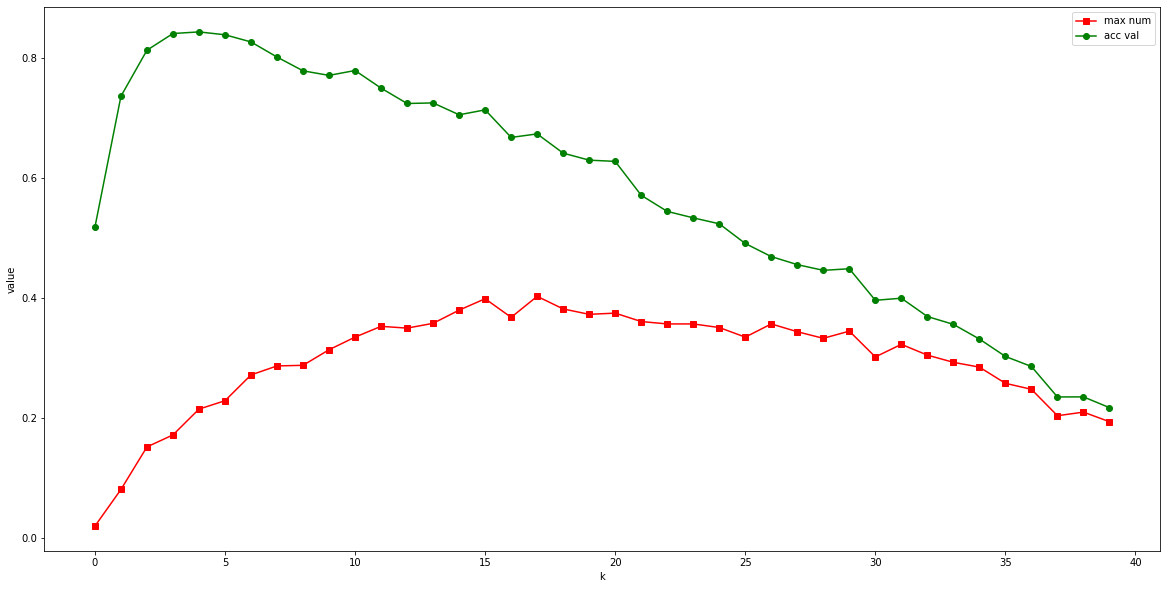

In [11]:
import matplotlib.pyplot as plt

max_number_list = []
accumulation_value_list = []
_range = range(0, 40)

for i in _range:
    _ = wheat_estimate(max_num = 50,  iteration_times = 1000, number_k = i)
    max_number_list.append(_[0])
    accumulation_value_list.append(_[1])


plt.figure(figsize=(20,10))

plt.plot(_range, max_number_list, 's-',color = 'r', label="max num")
plt.plot(_range, accumulation_value_list,'o-',color = 'g', label="acc val")

plt.xlabel("k")
plt.ylabel("value")
plt.legend()

plt.show()


In [12]:
(1/np.e) * 50

18.393972058572118

# 如果我們考慮其他策略

如果觀察前 $k$ 個， 如果比 ob_max $*$ rate_k 大我們就選他


In [32]:
def wheat_estimate(max_num = 100, iteration_times = 100, number_k = 30, rate_k = 1.0, rate = None):
    if rate:
        number_k = int(max_num * rate)

    accumulation_max_number = 0
    accumulation_value = 0

    for t in range(iteration_times):
        choose = 0
        permuted = np.random.permutation(range(1,max_num+1))
        if number_k == 0:
            ob_max = 0
        else:    
            ob_max = max(permuted[:number_k])

        for i in range(number_k, max_num):
            if permuted[i] > (ob_max * rate_k):   # 差在這邊
                choose = permuted[i]
                break
        
        if choose == max_num:
            accumulation_max_number += 1

        accumulation_value += (choose / max_num)

    return (accumulation_max_number / iteration_times), (accumulation_value / iteration_times)


    

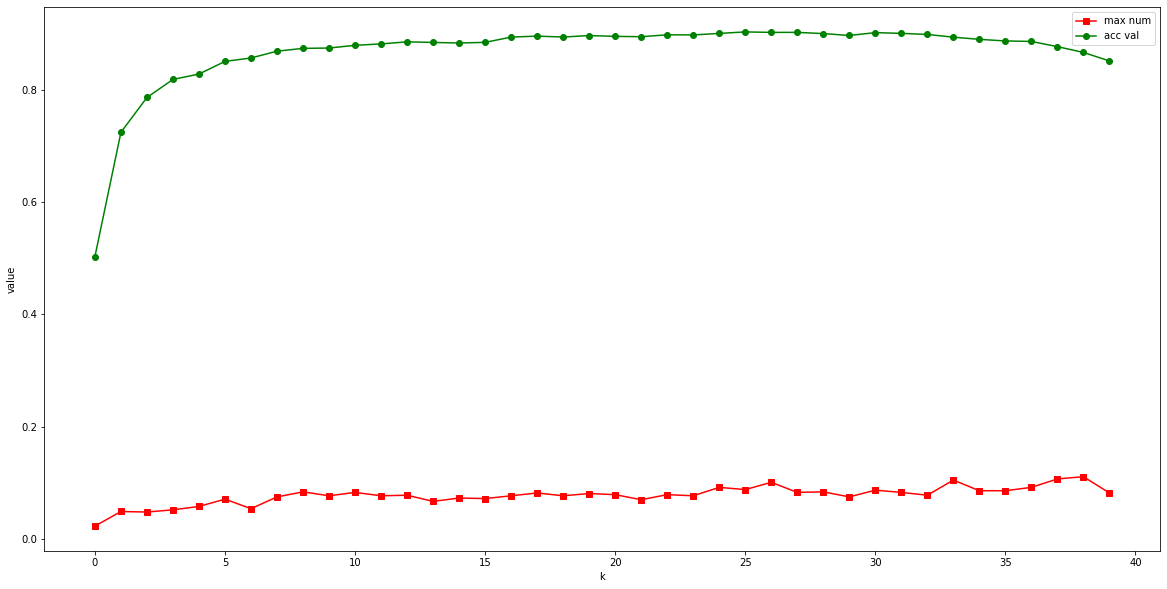

In [34]:
import matplotlib.pyplot as plt

max_number_list = []
accumulation_value_list = []
_range = range(0, 40)

for i in _range:
    _ = wheat_estimate(max_num = 50,  iteration_times = 1000, number_k = i, rate_k = 0.8)
    max_number_list.append(_[0])
    accumulation_value_list.append(_[1])


plt.figure(figsize=(20,10))

plt.plot(_range, max_number_list, 's-',color = 'r', label="max num")
plt.plot(_range, accumulation_value_list,'o-',color = 'g', label="acc val")

plt.xlabel("k")
plt.ylabel("value")
plt.legend()

plt.show()

# 如果現在

你不知道面對的人生，你可以觀察幾次


In [2]:
import numpy as np
np.random.randint(10, size=5) + 1

array([3, 1, 4, 5, 6])

In [35]:

def wheat_estimate(max_num = 100, iteration_times = 100, number_k = 30, rate_k = 1.0, rate = None):
    if rate:
        number_k = int(max_num * rate)

    accumulation_max_number = 0
    accumulation_value = 0

    max_num_list =  np.random.randint(max_num, size=iteration_times) + 1    # 差在這邊

    for max_number in max_num_list:
        choose = 0
        permuted = np.random.permutation(range(1,max_number+1))
        if number_k == 0:
            ob_max = 0
        else:    
            ob_max = max(permuted[:number_k])

        for i in range(number_k, max_number):
            if permuted[i] > (ob_max * rate_k):
                choose = permuted[i]
                break
        
        if choose == max_number:
            accumulation_max_number += 1

        accumulation_value += (choose / max_number)

    return (accumulation_max_number / iteration_times), (accumulation_value / iteration_times)





# 我們看看固定 rate_k 找 觀察 k 哪個好

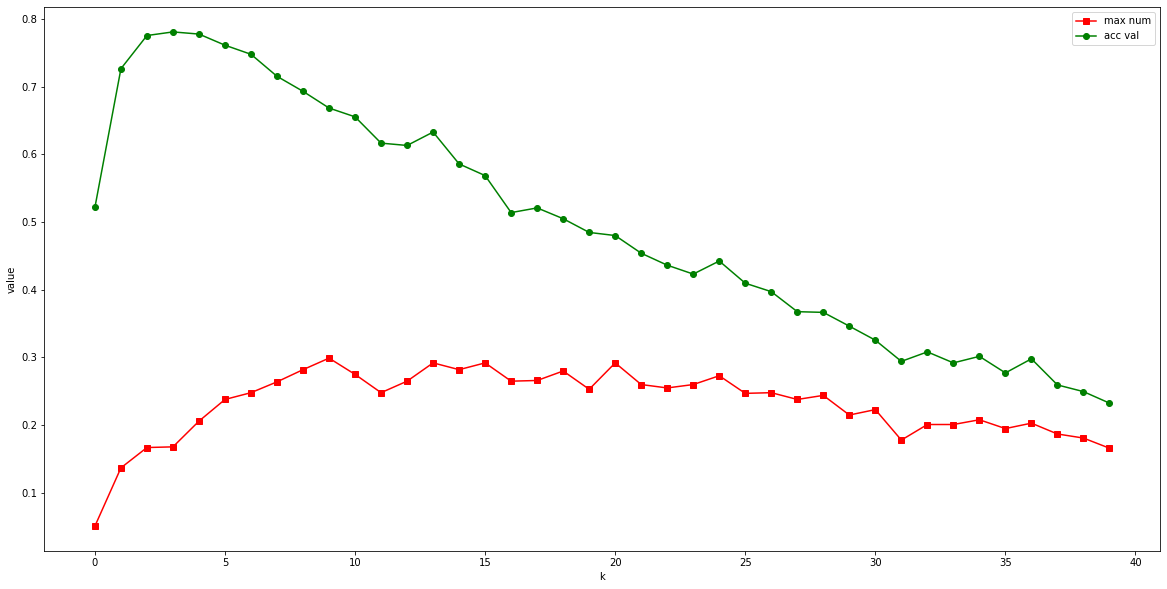

In [36]:
import matplotlib.pyplot as plt

max_number_list = []
accumulation_value_list = []
_range = range(0, 40)

for i in _range:
    _ = wheat_estimate(max_num = 100,  iteration_times = 1000, number_k = i, rate_k = 1.0)
    max_number_list.append(_[0])
    accumulation_value_list.append(_[1])


plt.figure(figsize=(20,10))

plt.plot(_range, max_number_list, 's-',color = 'r', label="max num")
plt.plot(_range, accumulation_value_list,'o-',color = 'g', label="acc val")

plt.xlabel("k")
plt.ylabel("value")
plt.legend()

plt.show()

# 我們看看固定 k 找 rate_k 哪個好

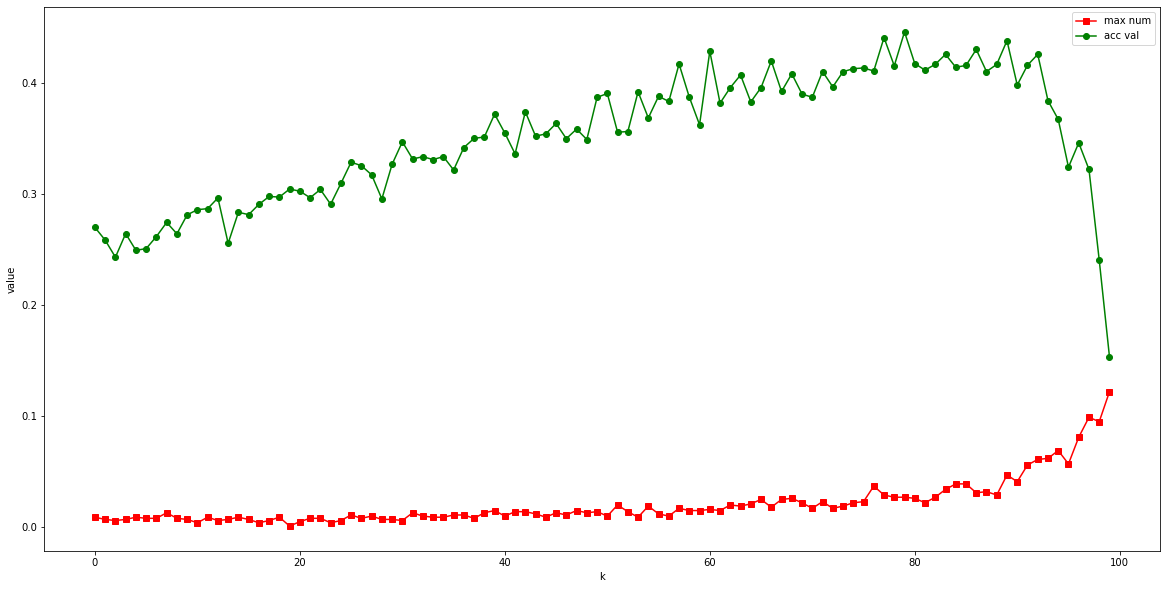

In [47]:
import matplotlib.pyplot as plt

max_number_list = []
accumulation_value_list = []
fix_k = 50
division_num = 100
_range = range(0, division_num)

for i in _range:
    _ = wheat_estimate(max_num = 100,  iteration_times = 1000, number_k = fix_k, rate_k = (i/division_num))
    max_number_list.append(_[0])
    accumulation_value_list.append(_[1])


plt.figure(figsize=(20,10))

plt.plot(_range, max_number_list, 's-',color = 'r', label="max num")
plt.plot(_range, accumulation_value_list,'o-',color = 'g', label="acc val")

plt.xlabel("k")
plt.ylabel("value")
plt.legend()

plt.show()